In [5]:
# Cargar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Cargar los archivos
defunciones_clean = pd.read_csv('defunciones_clean.csv')
cie = pd.read_csv('CIE.csv')

# Filtrar los códigos de las enfermedades
enfermedades_buscadas = ['Infarto del miocardio', 'Neumonía no especificada', 'Fallecida, sin mención de complicación']
cie_filtrado = cie[cie['descripcion'].str.contains('|'.join(enfermedades_buscadas), case=False, na=False)]

# Extraer los códigos de las enfermedades relacionadas
codigos_enfermedades = cie_filtrado['codigo'].tolist()

# Filtrar el dataset de defunciones por los códigos encontrados
defunciones_clean_filtrado = defunciones_clean[defunciones_clean['causa'].isin(codigos_enfermedades)]

# Limpiar las columnas no necesarias o irrelevantes (puedes ajustar según lo necesario)
defunciones_clean_filtrado = defunciones_clean_filtrado.dropna(subset=['edad', 'sexo', 'año_registrado', 'causa'])

# Convertir las variables categóricas a numéricas (si es necesario)
label_encoder = LabelEncoder()
defunciones_clean_filtrado['sexo'] = label_encoder.fit_transform(defunciones_clean_filtrado['sexo'])
defunciones_clean_filtrado['causa'] = label_encoder.fit_transform(defunciones_clean_filtrado['causa'])

# Crear las variables X (predictoras) e y (respuesta)
X = defunciones_clean_filtrado[['sexo', 'edad', 'año_registrado']]  # Asegúrate de usar las variables correctas
y = defunciones_clean_filtrado['causa']

# Particionar los datos en diferentes proporciones
# 70% entrenamiento, 30% prueba
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.30, random_state=42)
# 80% entrenamiento, 20% prueba
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.20, random_state=42)
# 85% entrenamiento, 15% prueba
X_train_85, X_test_85, y_train_85, y_test_85 = train_test_split(X, y, test_size=0.15, random_state=42)

# Inicializar el clasificador Naive Bayes
naive_bayes = GaussianNB()

# Entrenar y evaluar el modelo para cada partición
def evaluar_modelo(X_train, X_test, y_train, y_test):
    naive_bayes.fit(X_train, y_train)
    y_pred = naive_bayes.predict(X_test)
    return classification_report(y_test, y_pred)

# Evaluar con las diferentes particiones
resultado_70_30 = evaluar_modelo(X_train_70, X_test_70, y_train_70, y_test_70)
resultado_80_20 = evaluar_modelo(X_train_80, X_test_80, y_train_80, y_test_80)
resultado_85_15 = evaluar_modelo(X_train_85, X_test_85, y_train_85, y_test_85)

# Mostrar los resultados
print("Resultado 70/30:")
print(resultado_70_30)
print("\nResultado 80/20:")
print(resultado_80_20)
print("\nResultado 85/15:")
print(resultado_85_15)


C:\Users\Silvia\AppData\Local\Temp\ipykernel_22692\531033578.py:9: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  defunciones_clean = pd.read_csv('defunciones_clean.csv')


Resultado 70/30:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Resultado 80/20:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1


Resultado 85/15:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



C:\Users\Silvia\AppData\Local\Temp\ipykernel_16756\3475170302.py:12: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  defunciones_clean = pd.read_csv('defunciones_clean.csv')


Resultados de validación cruzada (precisión):
[0.12859868 0.12819995 0.12967879 0.12891666 0.12858859 0.12905294
 0.12947186 0.1281091  0.12929016 0.12834697]
Precisión media: 0.1288
Resultado 70/30 Naive Bayes:


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           4       0.00      0.00      0.00     10012
           7       0.36      0.47      0.41     10075
           9       0.00      0.00      0.00     10177
          11       0.06      0.03      0.04     10142
          13       0.12      0.24      0.16      9994
          18       0.07      0.14      0.09     10017
          19       0.00      0.00      0.00     10005
          20       0.00      0.00      0.00     10140
          21       0.00      0.00      0.00     10106
          22       0.00      0.00      0.00     10039
          23       0.01      0.01      0.01     10040
          24       0.00      0.00      0.00     10026
          25       0.01      0.01      0.01     10151
          26       0.00      0.00      0.00     10094
          27       0.13      0.02      0.04     10075
          28       0.00      0.00      0.00     10134
          29       0.00      0.00      0.00     10097
          30       0.00    

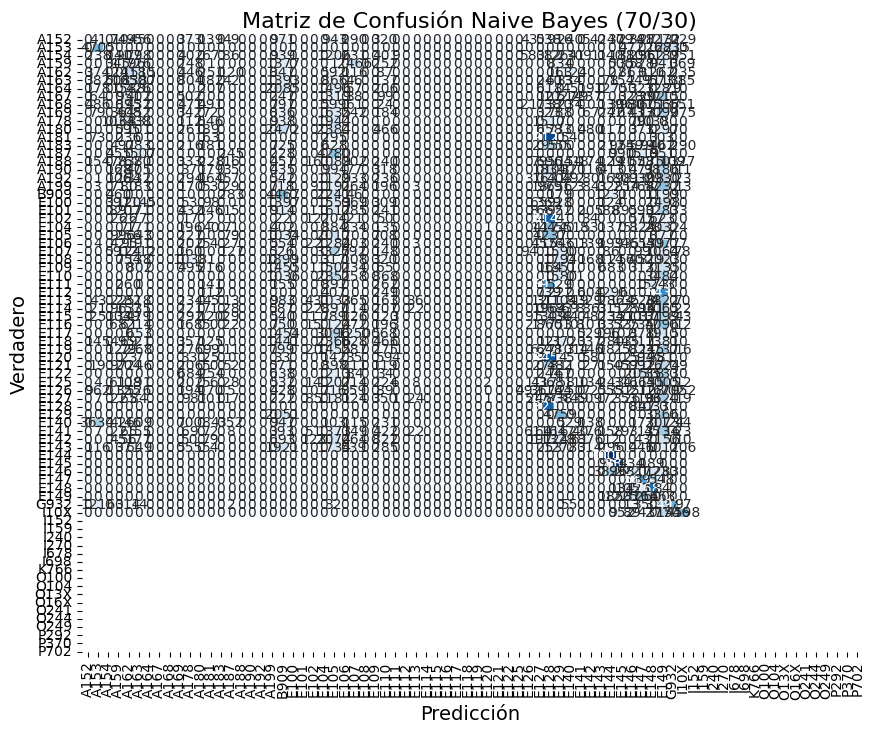

Resultado 80/20 Naive Bayes:


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           4       0.00      0.00      0.00      6726
           7       0.36      0.47      0.41      6717
           9       0.00      0.00      0.00      6768
          11       0.06      0.03      0.04      6670
          13       0.12      0.24      0.16      6622
          18       0.06      0.14      0.09      6626
          19       0.00      0.00      0.00      6722
          20       0.00      0.00      0.00      6736
          21       0.00      0.00      0.00      6802
          22       0.00      0.00      0.00      6618
          23       0.00      0.00      0.00      6707
          24       0.00      0.00      0.00      6645
          25       0.01      0.01      0.01      6761
          26       0.00      0.00      0.00      6700
          27       0.13      0.02      0.04      6704
          28       0.00      0.00      0.00      6765
          29       0.00      0.00      0.00      6746
          30       0.00    

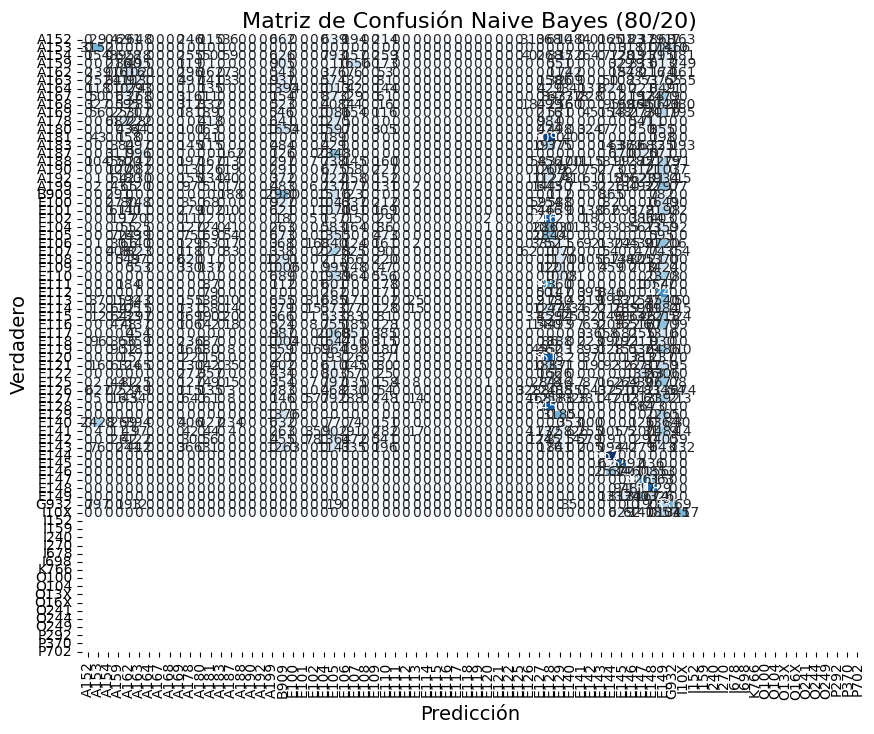

Resultado 85/15 Naive Bayes:


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           4       0.00      0.00      0.00      5035
           7       0.36      0.47      0.41      4983
           9       0.00      0.00      0.00      5032
          11       0.06      0.03      0.04      5001
          13       0.13      0.25      0.17      4975
          18       0.07      0.14      0.09      4949
          19       0.00      0.00      0.00      5022
          20       0.00      0.00      0.00      5020
          21       0.00      0.00      0.00      5122
          22       0.00      0.00      0.00      4966
          23       0.01      0.01      0.01      4989
          24       0.00      0.00      0.00      5010
          25       0.01      0.00      0.01      5043
          26       0.00      0.00      0.00      5058
          27       0.12      0.01      0.02      5089
          28       0.00      0.00      0.00      5093
          29       0.00      0.00      0.00      5052
          30       0.00    

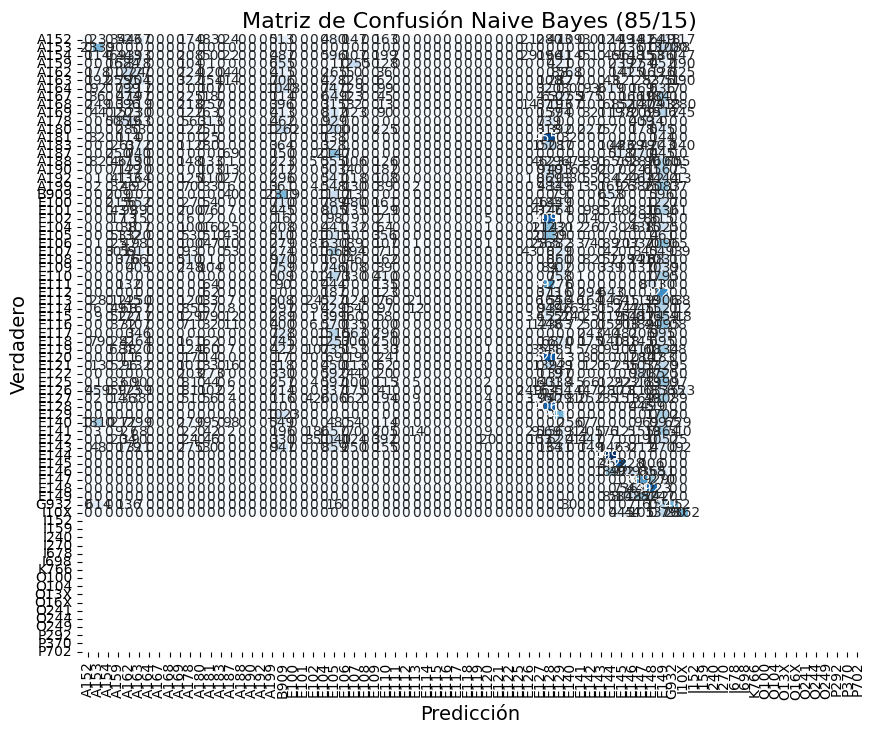

In [16]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los archivos CSV
defunciones_clean = pd.read_csv('defunciones_clean.csv')
cie = pd.read_csv('CIE.csv')

# Ampliar el filtro de enfermedades a otras más comunes
enfermedades_buscadas = [
    'Infarto del miocardio', 'Neumonía no especificada', 'Fallecida, sin mención de complicación',
    'Hipertensión', 'Diabetes mellitus', 'Enfermedades cerebrovasculares', 'Cáncer', 'Tuberculosis'
]
cie_filtrado = cie[cie['descripcion'].str.contains('|'.join(enfermedades_buscadas), case=False, na=False)]

# Extraer los códigos de las enfermedades relacionadas
codigos_enfermedades = cie_filtrado['codigo'].tolist()

# Filtrar el dataset de defunciones por los códigos encontrados
defunciones_clean_filtrado = defunciones_clean[defunciones_clean['causa'].isin(codigos_enfermedades)]

# Limpiar las columnas no necesarias o irrelevantes
defunciones_clean_filtrado = defunciones_clean_filtrado.dropna(subset=['edad', 'sexo', 'año_registrado', 'causa'])

# Reemplazar los valores de edad atípicos (999 por la mediana)
defunciones_clean_filtrado['edad'] = defunciones_clean_filtrado['edad'].replace(999, defunciones_clean_filtrado['edad'].median())

# Convertir las variables categóricas a numéricas
label_encoder = LabelEncoder()
defunciones_clean_filtrado['sexo'] = label_encoder.fit_transform(defunciones_clean_filtrado['sexo'])
defunciones_clean_filtrado['causa'] = label_encoder.fit_transform(defunciones_clean_filtrado['causa'])

# Crear las variables X (predictoras) e y (respuesta)
X = defunciones_clean_filtrado[['sexo', 'edad', 'año_registrado']]  # Asegúrate de usar las variables correctas
y = defunciones_clean_filtrado['causa']

# Filtrar las clases con más de 2 registros
clases_validas = y.value_counts()
clases_validas = clases_validas[clases_validas > 2].index  # Mantener solo clases con más de 2 registros

# Filtrar X y y para que solo contengan las clases válidas
X_filtrado = X[y.isin(clases_validas)]
y_filtrado = y[y.isin(clases_validas)]

# Aplicar SMOTE solo si hay más de una clase
if len(pd.Series(y_filtrado).value_counts()) > 1:
    smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=2)
    X_resampled, y_resampled = smote.fit_resample(X_filtrado, y_filtrado)

    # Escalar las características numéricas
    scaler = StandardScaler()
    X_resampled = scaler.fit_transform(X_resampled)

    # Definir las particiones: 70/30, 80/20, 85/15
    partitions = {
        "70/30": (0.30, "70/30"),
        "80/20": (0.20, "80/20"),
        "85/15": (0.15, "85/15")
    }

    # Inicializar el clasificador Naive Bayes
    naive_bayes = GaussianNB()

    # Función para evaluar el modelo con particiones y validación cruzada
    def evaluar_modelo(X_train, X_test, y_train, y_test, partition_name):
        # Entrenar el modelo
        naive_bayes.fit(X_train, y_train)
        y_pred = naive_bayes.predict(X_test)
        
        # Evaluación del modelo
        print(f"Resultado {partition_name} Naive Bayes:")
        print(classification_report(y_test, y_pred))

        # Matriz de confusión
        cm = confusion_matrix(y_test, y_pred)
        print(f"Matriz de Confusión {partition_name} Naive Bayes:")
        print(cm)

        # Graficar la matriz de confusión
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
        plt.title(f"Matriz de Confusión Naive Bayes ({partition_name})", fontsize=16)
        plt.xlabel('Predicción', fontsize=14)
        plt.ylabel('Verdadero', fontsize=14)
        plt.show()

    # Validación cruzada
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cross_val_results = cross_val_score(naive_bayes, X_resampled, y_resampled, cv=kfold, scoring='accuracy')
    print("Resultados de validación cruzada (precisión):")
    print(cross_val_results)
    print(f'Precisión media: {cross_val_results.mean():.4f}')

    # Evaluar el modelo en las tres particiones
    for partition_name, (test_size, display_name) in partitions.items():
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=test_size, random_state=42)
        evaluar_modelo(X_train, X_test, y_train, y_test, display_name)

else:
    print("Error: Después del filtrado, solo hay una clase, no se puede aplicar SMOTE.")
